# Exploration of the Construction of Liquid Fuel Bipropellant Rocket Engines Utilizing Additive Manufacturing Processes


## Abstract:

The Portland State Aerospace Society (PSAS) is an engineering student group and citizen science project at Portland State University dedicated to building low-cost, open-source, open-hardware rockets and avionics systems. The group’s stated long term goal is to place a 1 kg cubesat into low Earth orbit with their own launch vehicle. One step needed to achieve this goal is to transition the current rocket design from a solid motor to a liquid fuel engine. The liquid propelled rocket engine project is being conducted as part of a mechanical engineering senior capstone project at Portland State University. This project is on track to being completed by June of 2016.

The complexity and cost of building a liquid fuel rocket engine typically makes such devices unobtainable for a majority of parties interested in their construction. Until recently, manufacturing processes and techniques limited the geometries available to the designer and rendered such engines cost prohibitive as options for inexpensive orbital space flight. Advances in additive manufacturing technologies provide the potential to prototype complex geometries on a lower budget and with shorter lead times which would be considered unobtainable with traditional manufacturing methods. Furthermore, bipropellant liquid fuels offer many complex engineering considerations; the full analysis of which may not be within the design ability of many amateur builds. It is therefore advantageous to develop techniques for additive manufacturing rapid prototyping to make the study of bipropellant fuels more accessible.

Explored herein is the process of designing and testing a liquid bipropellant engine on the scale of 50-1000 lbf of thrust using liquid oxygen (LOX) and ethanol as propellants. A low cost pintle injector and accompanying regeneratively cooled thrust chamber is developed using a combination of traditional manufacturing techniques and additive processes. Equations have been determined to describe the more complex geometries of the nozzle contour and the sizing of other important components. Figure 1 shows the preliminary design of the combustion chamber and nozzle with cooling channels. Heat transfer analysis is being conducted to determine the type of metal to be selected for the nozzle and cooling chamber, most likely a high-temperature steel such as inconel.


Figure 1: Combustion chamber and nozzle preliminary design

In order to achieve a simple and easy to manufacture pintle injector design, the regenerative cooling channel interface, fuel manifold and most of the injector plate will be part of the additively manufactured combustion chamber. The design will accommodate easy installation of different injector types to allow for testing of different injector and spray configurations. Cold flow tests will be conducted to study the viscous losses in 3D-printed metal cooling channels, manifold system, and pintle injector designs.

An engine test-stand has been constructed and a pressure fed fuel system with actuated valves is being developed for fuel delivery. Pressure transducers and thermocouples will be ported into the final engine design to collect pressure and temperature data in the nozzle and combustion chamber. Analytical solutions and empirical data will be compared against simulations carried out by computational fluid dynamics (CFD) simulations. CFD simulations will be conducted using Loci/CHEM and Star-CCM+ simulation software.

#### Initial Design Considerations

Parameters must be selected. The generation of force is the desire of a rocket engine. the force equation is:

$$ F = \frac{\dot{w}}{g} V_{e} + A_{e}(P_{e}-P_{a}) $$

This is important when designing engines for flight, but when testing engines $P_{e}$ is optimally expanded and assumed to be atmospheric pressure (14.7 psia) and the equation becomes:

$$ F = \frac{\dot{w}}{g} V_{e} $$

For engines in flight the effective exhaust velocity, $c$, can be used, and equation X can be expressed as:

$$F = c\frac{\dot{W}}{g} $$

Where c is defined as

$$c=V_{e} + A_{e}(P_{e}-P_{a})\frac{g}{\dot{W}} $$

which changes with altitude.

For a desired force, there must then be selected an exit velocity to find the necessary flow rate, $\dot{w}$. The theoretical exit velocity is defined as:

$$V_{e} = \sqrt{\frac{2g\gamma}{\gamma-1}RT_{i}\bigg[1-\bigg(\frac{P_{e}}{P_{i}}\bigg)\bigg]^\frac{\gamma-1}{\gamma}+v_{i}^2} $$

Because the inlet velocity is very small, it is assumed to be zero, this gives the following:

$$V_{e} = \sqrt{\frac{2g\gamma}{\gamma-1}R(T_{c})_{ns}\bigg[1-\bigg(\frac{P_{e}}{(P_{c})_{ns}}\bigg)\bigg]^\frac{\gamma-1}{\gamma}} $$

which is dependent on the propellants, chamber pressure which should be chosen for the design, $P_{i}$, and the mach number at the nozzle inlet, Mi, which must be calculated iteratively. 

Pressure at the exit, Pe, of a test nozzle should be expanded to the pressure of testing conditions (assumed to be sea-level atmospheric pressure).

Flame temperature and gamma can be obtained for a given propellant combination by using NASA's [CEArun](https://cearun.grc.nasa.gov/) tool. [link to portion in document which describes how to use cearun](internallinkhere)

The propellent mixture ratio, can be used to manipulate flame temperature as well as cooling capacity. Increasing fuel; and thereby decreasing rw, will result in lower temperatures and more coolant mass flow-rate. CEArun should be used to determine the effect of a given mixture ratio.

Things to add to this section:
choosing OF ratios, (maximize theoretical specific impulse, balance with temperature limits, increases in oxidizer tend to lead to higher temperatures. selecting chamber pressures should be dependent on material limits, impulse tends to increase with increases in pressure, more enthalpy is available to convert to exhaust velocity, higher pressures generally result in higher temperatures.

define constants to be used in mathmatics. discuss gas constants and their calculations.

discuss each parameter as well as nomenclature, what does inj, inlet, throat, or exit mean, show locations in diagrams.




In [164]:
import math
from mpmath import *
from IPython.display import display
from ipywidgets import widgets

#Define Constants
g     = 32.2  # gravitational constant in ft/s^2
J     = 778   # Energy conversion factor (ft-lb/Btu)
Regas = 1544  # Gas constant (ft/degR)
Rgas  = 8.314 # Gas constant (J/mol/K)

In [165]:
#initial design considerations inputs
F_        = widgets.Text("250",           description="Force, F (lbf)",                              width=60 )
M_        = widgets.Text("24.029",        description="Molecular Weight, (lb/lb-mol)",               width=100)
Pa_       = widgets.Text("14.7",          description="Atmospheric Pressure, (lbf/in^2)",            width=60 )
Pe_       = widgets.Text("14.7",          description="Exit Pressure, Pe (lbf/in^2) ",               width=60 )
Pinj_     = widgets.Text("350",           description="Pressure at injector, (lb/in^2)",             width=60 )
rw_       = widgets.Text("1.2",           description="(oxidizer/fuel) Weight mixture ratio",        width=60 )
rwfuel_   = widgets.Text("59.5",          description="Fuel mixture percentage",                     width=60 )
Tamb_     = widgets.Text("519.67",        description="Ambient temperature, (deg R)",                width=60 )
Tcns_     = widgets.Text("5487.1",        description="Flow temperature at nozzle inlet, (deg R)",   width=80 )
epsilonc_ = widgets.Text("7",             description="Contraction ratio",                           width=60 )
gam_      = widgets.Text("1.1208",        description="Specific heat ratio",                         width=60 )

display(F_)
display(M_)
display(Pa_)
display(Pe_)
display(Pinj_)
display(rw_)
display(rwfuel_)
display(Tamb_)
display(Tcns_)
display(epsilonc_)
display(gam_)

In [166]:
F        = float(F_.value)        #Nozzle force
M        = float(M_.value)        #Molecular Weight
Pa       = float(Pa_.value)       #Atmospheric Pressure
Pe       = float(Pe_.value)       #Pressure at exit
Pinj     = float(Pinj_.value)     #Pressure at injector
rw       = float(rw_.value)       #Weight mixture ratio
rwfuel   = float(rwfuel_.value)   #Fuel mixture percentage
Tamb     = float(Tamb_.value)     #Ambient temperature
Tcns     = float(Tcns_.value)     #Nozzle stagnation temperature
epsilonc = float(epsilonc_.value) #Contraction ratio
gam      = float(gam_.value)      #Specific Heat Ratio

In [167]:
#Itterative process to find mach number at the inlet.
Mi_current = .3 # a reasonable guess for mach number at inlet
Mi_last = 0

while (abs(Mi_current-Mi_last)>0.0001):
    Mi_last = Mi_current
    Mi_current = math.sqrt(((1+(gam-1)/2*Mi_last)/((gam+1)/2))**((gam+1)/(gam-1)))/epsilonc

Mi = Mi_current

print("Mach Number at inlet: %.2f" % Mi)

Mach Number at inlet: 0.09


In [168]:
#Assumptions

Pcinj    = Pinj                   #Chamber total pressure is equal to injector pressure
Minj     = 0                      #Mach number at injector assumed to be zero
R        = Regas/M                #Gas constant for the flow
Tci      = Tamb                   #Fuel holding temperature is equal to ambient temp
Vinj     = 0                      #Injector velocity is zero

In [169]:
#Calculations

Pcns     = Pcinj*(1+((gam-1)/2)*Mi**2)**(gam/(gam-1))/(1+gam*Mi**2)                   #Nozzle stagnation pressure
Pi       = Pinj/(1+gam*Mi**2)                                                         #Pressure at inlet
Pt       = Pcns*(2/(gam+1))**(gam/(gam-1))                                            #Pressure at throat
Vt       = math.sqrt(((2*g*gam)/(gam+1))*R*Tcns)                                      #Velocity at throat
Ve       = math.sqrt(((2*g*gam)/(gam-1))*R*Tcns*(1-(Pe/Pi)**((gam-1)/gam)))           #Velocity at exit
wdot     = F*g/Ve                                                                     #Propellant flow rate
wdotf    = 1/(1+rw)*wdot                                                              #Fuel mass flow rate
wdoto    = wdot-wdotf                                                                 #Ox mass flow rate
#At       = wdot/(Pcns*math.sqrt(g*gam*(2/(gam+1))**((gam+1)/(gam-1))/R/Tcns))         #Area of throat
Tt       = Tcns*(Pt/Pcns)**((gam-1)/gam)
Volumet  = R*Tt/144/Pt
At       = 144*wdot*Volumet/Vt
epsilon  = ((2/(gam+1))**(1/(gam-1))*(Pcns/Pe)**(1/gam)/math.sqrt((gam+1)/
                        (gam-1)*(1-(Pe/Pcns)**((gam-1/gam)))))                        #Expansion ratio
Ae       = At*epsilon                                                                 #Area of exit
c        = Ve+Ae*(Pe-Pa)*(g/wdot)                                                     #Effective exhaust velocity
Ti       = Tcns/(1+.5*(gam-1)*Mi**2)                                                  #Inlet temperature
Te       = Ti/(Pi/Pe)**((gam-1)/gam)                                                  #Temperature at exit

In [170]:
#Print results
print("Pressures:")
print("Total Chamber,  Pcinj (psi):    %.2f"   % Pcinj)
print("Stagnation,     Pcns (psi):     %.2f"   % Pcns)
print("Inlet,          Pi (psi):       %.2f"   % Pi)
print("Throat,         Pt (psi):       %.2f\n" % Pt)
print("Velocities:")
print("Throat,         Vt (ft/sec):    %.2f"   % Vt)
print("Exit,           Vt (ft/sec):    %.2f"   % Ve)
print("Effective,      c  (ft/sec):    %.2f\n" % c)
print("Mass Flow Rates:")
print("Total,          wdot (lb/sec):  %.2f"   % wdot)
print("Fuel,           wdotf (lb/sec): %.2f"   % wdotf)
print("Oxidizer,       wdoto (lb/sec): %.2f\n" % wdoto)
print("Temperatures:")
print("Fuel (holding), Tci (R):        %.2f"   % Tci)
print("Stagnation,     Tcns (R):       %.2f"   % Tcns)
print("Inlet,          Ti (R):         %.2f\n"  % Ti)

Pressures:
Total Chamber,  Pcinj (psi):    350.00
Stagnation,     Pcns (psi):     348.45
Inlet,          Pi (psi):       346.88
Throat,         Pt (psi):       202.22

Velocities:
Throat,         Vt (ft/sec):    3464.05
Exit,           Vt (ft/sec):    7799.19
Effective,      c  (ft/sec):    7799.19

Mass Flow Rates:
Total,          wdot (lb/sec):  1.03
Fuel,           wdotf (lb/sec): 0.47
Oxidizer,       wdoto (lb/sec): 0.56

Temperatures:
Fuel (holding), Tci (R):        519.67
Stagnation,     Tcns (R):       5487.10
Inlet,          Ti (R):         5484.45



In [171]:
#material properties

# Typical values for various printable materials
# Inconel 718:         a = 0.000008065 , E = 25450000 , k = .000225694 , Twg = 1700 , v = 0.274 , RA = 650*10**-6 in
# Aluminum (AlSi10Mg): a = 0.000014 , E = 10200000 , k = 0.001716667 - 0.001983333, Twg = 1500, v = 0.33 , RA = 0.59-0.75 * 10**-3 in
# Cobalt Chrome:       a = 0.0000069 , E = 30000000 , k = 0.000333333 , Twg = 2563 , v = 0.29 , RA = 0.39 *10**-3 in
# Titanium:            a = 0.000032724 , E =16100000 , k = .000111667 , Twg = 3479 , v = 0.31, RA 
# Steel

Props = [
    #     a              E              k          Twg        v         RA
    ["0.000008065" , "25450000" , "0.000225694" , "1700" , "0.274" , "0.00065"], # 0 Inconel
    ["0.000014"    , "10200000" , "0.001716667" , "1150" , "0.33"  , "0.00059"], # 1 Aluminum
    ["0.0000069"   , "30000000" , "0.000333333" , "2563" , "0.29"  , "0.00039"], # 2 Cobalt Chrome
    ["0.000032724" , "16100000" , "0.000111667" , "3479" , "0.31"  , "0.00065"]  # 3 Titanium
        ]
MatInd = 1 # Material index

a_        = widgets.Text(Props[MatInd][0], description="Thermal expansion ratio nozzle material",        width=100)
E_        = widgets.Text(Props[MatInd][1], description="Elastic modulus of nozzle material, E (psi)",    width=60 )
k_        = widgets.Text(Props[MatInd][2], description="Wall thermal conductivity, k (Btu-in/in^2-s-F)", width=120)
Twg_      = widgets.Text(Props[MatInd][3], description="Maximum Material Temperature at wall, (deg R)",  width=60 )
v_        = widgets.Text(Props[MatInd][4], description="Poisson's ratio nozzle material",                width=60 )
RA_       = widgets.Text(Props[MatInd][5], description="Surface Rougness, (inch RA)",                    width=100)



#display user input boxes
display(a_)
display(E_)
display(k_)
display(Twg_)
display(v_)
display(RA_)

In [172]:
#Convert user inputs to float
a        = float(a_.value)        #Thermal expansion ratio of nozzle material
E        = float(E_.value)        #Elastic modulus of nozzle material
k        = float(k_.value)        #Wall thermal conductivity
Twg      = float(Twg_.value)      #Maximum Wall Temperature
v        = float(v_.value)        #Poisson's ratio nozzle material
RA       = float(RA_.value)       #RA surface roughness of nozzle material

In [173]:
#Define User Inputs for Equation Variables, assign values to default values

ARhb_     = widgets.Text("3",             description="Cooling channel aspect ratio at throat",        width=60 )
Bpf_      = widgets.Text("632.07",        description="Boiling Point of Fuel, Bpf (deg K)",            width=100)
CpFuel_   = widgets.Text("0.5876",        description="Specific heat of pure Fuel, CpFuel (BTU/lb-F)", width=100)
DelPi_    = widgets.Text("87.5",          description="Injector pressure drop, DelPi (lbf/in^2)",      width=60 )
Hvapf_    = widgets.Text("38600",         description="Fuel heat of vaporization, Hvapf (KJ/mol)",     width=60 )
Lc_       = widgets.Text("3.5",           description="Chamber Length, Lc (in) ",                      width=60 )
Lstar_    = widgets.Text("50",            description="Characteristic Chamber Length, L* (in) ",       width=60 )
nc_       = widgets.Text("1.1",           description="Nucleate boiling factor of safety, nc",         width=60 )
Pco_      = widgets.Text("500",           description="Initial fuel pressure, Pco (lbf/in^2)",         width=60 )
Tt_       = widgets.Text("5232.4",        description="Throat Temperature (deg R)",                    width=80 )
eta_      = widgets.Text("0.90",          description="Combustion efficiency",                         width=60 )

#Display user input text boxes
display(ARhb_)
display(Bpf_)
display(CpFuel_)
display(DelPi_)
display(Hvapf_)
display(Lc_)
display(Lstar_)
display(nc_)
display(Pco_)
display(Tt_)
display(eta_)

In [174]:
#Convert string entries to floats
ARhb     = float(ARhb_.value)     #Cooling channel aspect ratio
Bpf      = float(Bpf_.value)      #Boiling Point of fuel
CpFuel   = float(CpFuel_.value)   #Specific Heat of pure fuel
DelPi    = float(DelPi_.value)    #Pressure drop across injector
Hvapf    = float(Hvapf_.value)    #Fuel heat of vaporization
Lc       = float(Lc_.value)       #Length of Combustion Chamber
Lstar    = float(Lstar_.value)    #Characteristic Chamber Length
nc       = float(nc_.value)       #Nucleate boiling factor of safety
Pco      = float(Pco_.value)      #Initial fuel pressure
Tt       = float(Tt_.value)       #Temperature of throat flow
eta      = float(eta_.value)      #Combustion efficiency

In [175]:
#Performance Parameters

Is     = F/wdot                                                               #Specific Impulse
Istc   = c/g                                                                  #Thrust chamber specific impulse
wdottc = F/Istc*eta                                                           #Thrust chamber propellant flow rate
cstar  = (math.sqrt(g*gam*R*Tcns)/gam
             /math.sqrt((2/(gam+1))**((gam+1)/(gam-1))))                      #Characteristic Velocity
Cf     = (math.sqrt(2*gam**2/(gam-1)*(2/(gam+1))**((gam+1)/(gam-1))
             *(1-(Pe/Pcns)**((gam-1)/gam)))+epsilon*((Pe-Pa)/Pcns))           #Thrust Coefficient

In [176]:
#Print Performance Parameters
print("Specific Impulse,                    Is:     %.2f" % Is)
print("Thrust Chamber specific impulse,     Istc:   %.2f" % Istc)
print("Thrust Chamber propellant flow rate, wdottc: %.2f" % wdottc)
print("Characteristic Velocity,             c*:     %.2f" % cstar)
print("Thrust Coefficient,                  Cf:     %.2f" % Cf)

Specific Impulse,                    Is:     242.21
Thrust Chamber specific impulse,     Istc:   242.21
Thrust Chamber propellant flow rate, wdottc: 0.93
Characteristic Velocity,             c*:     5325.59
Thrust Coefficient,                  Cf:     1.47


In [177]:
#Thrust Chamber Layout

Vc = Lstar*At    #Chamber volume
Ac = epsilonc*At #Chamber cross sectional area

In [178]:
#print thrust chamber layout

print("Chamnber Volume,              Vc: %.2f" % Vc)
print("Chamber Cross Sectional Area, Ac: %.2f" % Ac)

Chamnber Volume,              Vc: 24.50
Chamber Cross Sectional Area, Ac: 3.43


In [179]:
#Heat Transfer
CpH20  = 0.998137                                                #Water specific heat
Cpf    = rwfuel/100*CpFuel+(1-rwfuel/100)*CpH20                  #Coolant specific heat
Pr     = 4*gam/(9*gam-5)                                         #Prandtl number
mucc   = (46.6*10**-10)*M**0.5*Tcns                              #Viscosity in the combustion chamber
mut    = (46.6*10**-10)*M**0.5*Tt                                #Viscosity in the throat
rlam   = Pr**0.5                                                 #Laminar flow local recovery factor
rturb  = Pr**0.33                                                #Turbulent flow local recovery factor
Reffcc = ((1+rturb*((gam-1)/2)*Mi**2)/(1+((gam-1)/2)*Mi**2))
Refft  = ((1+rturb*((gam-1)/2))/(1+((gam-1)/2)))
Tawi   = Tcns*Reffcc                                             #Adiabatic wall temperature at inlet
Tawt   = Tcns*Refft                                              #Adiabatic wall temperature at throat
rt     = math.sqrt(At/math.pi)                                   #Radius of throat
re     = math.sqrt(Ae/math.pi)                                   #Radius of exit
rmean  = rt*(1.5+.382)/2                                         #Mean throat curvature
sigmat = (1/((.5*Twg/Tcns*(1+(gam-1)/2)+.5)**0.68                #Correction factor for property variations across BL
             *(1+(gam+1)/2)**0.12))                              #specified at throat
sigmai = (1/((.5*Twg/Tcns*(1+(gam-1)/2*Mi**2)+.5)**0.68          #Correction factor for property variations across BL
             *(1+(gam+1)/2*Mi**2)**0.12))                        #specified at inlet
Cp     = gam*R/(gam-1)/J                                         #Specific heat at constant pressure
hg     = ((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)
           *(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*sigmat)       #heat transfer coefficient at throat
q      = hg*(Tawt-Twg)                                           #required heat flux
Tcc    = 1.8/(Rgas/Hvapf*math.log((Pi+DelPi)/Pa)+1/Bpf)          #Critical temperature of fuel coolant
Twc    = Tcc/nc                                                  #Maximum coolant wall temperature
Qc     = wdotf*Cpf*(Twc-Tci)                                     #Coolant capacity
Tbulk  = (Twc + Tci)/2                                           #Coolant bulk temp
t      = k/q*(Twg-Tcc)                                           #Wall thickness
hc     = q/(Twc-Tbulk)                                           #Coolant side heat transfer coefficient
H      = 1/(1/hg+t/k+1/hc)                                       #Overall heat transfer coefficient


In [180]:
#print heat transfer
print("Coolant Specific Heat,                                         Cpf:    %.2f" % Cpf)
print("Prandtl Number,                                                Pr:     %.2f" % Pr)
print("Viscosity in combustion chamber,                               mucc:   %.8f" % mucc)
print("Viscosity in throat,                                           mut:    %.8f" % mut)
print("Laminar Flow Local Recovery Factor,                            rlam:   %.2f" % rlam)
print("Turbulent Flow Local Recovery Factor,                          rturb:  %.2f" % rturb)
print("Effective Combustion Chamber Recovery Factor,                  Reffcc: %.2f" % Reffcc)
print("Effective Throat Recovery Factor,                              Refft:  %.2f" % Refft)
print("Adiabatic wall temperature at inlet,                           Tawi:   %.2f" % Tawi)
print("Adiabatic wall temperature at throat,                          Tawt:   %.2f" % Tawt)
print("Throat radius,                                                 rt:     %.3f" % rt)
print("Exit radius,                                                   re:     %.3f" % re)
print("Mean throat curvature,                                         rmean:  %.3f" % rmean)
print("Correction factor for property variations across BL at throat, sigmat: %.2f" % sigmat)
print("Correction factor for property variations across BL at inlet,  sigmai: %.2f" % sigmai)
print("Specific heat at constant pressure,                            Cp:     %.5f" % Cp)
print("Heat transfer coefficient at throat,                           hg:     %.5f" % hg)
print("Required heat flux,                                            q:      %.2f" % q)
print("Critical temperature of coolant,                               Tcc:    %.2f" % Tcc)
print("Coolant capacity,                                              Qc:     %.2f" % Qc)
print("Coolant bulk temperature,                                      Tbulk:  %.2f" % Tbulk)
print("Wall thickness,                                                t:      %.5f" % t)
print("Coolant side heat transfer coefficient,                        hc:     %.5f" % hc)
print("Overall heat transfer coefficient,                             H:      %.5f" % H)

Coolant Specific Heat,                                         Cpf:    0.75
Prandtl Number,                                                Pr:     0.88
Viscosity in combustion chamber,                               mucc:   0.00012534
Viscosity in throat,                                           mut:    0.00011952
Laminar Flow Local Recovery Factor,                            rlam:   0.94
Turbulent Flow Local Recovery Factor,                          rturb:  0.96
Effective Combustion Chamber Recovery Factor,                  Reffcc: 1.00
Effective Throat Recovery Factor,                              Refft:  1.00
Adiabatic wall temperature at inlet,                           Tawi:   5486.99
Adiabatic wall temperature at throat,                          Tawt:   5474.33
Throat radius,                                                 rt:     0.395
Exit radius,                                                   re:     0.733
Mean throat curvature,                                         rmean

In [181]:
import sympy as sympy

from sympy.solvers import solve
from sympy import Symbol
from sympy import log

muf = 2.7998705 *10**-5 
rhof = 0.031972653 #density of 70% ethanol (lb per cubic inch)

#solve for minimum number of cooling channels to acheive appropriate cross sectional area,
#and the appropriate channel aspect ratio

n_g    = 0                                 #a reasonable guess for a particular geometries number of cooling channels
n      = 1
while (abs(n_g-n)>0):
    n_g   = n
    bt    = (2*(rt+t)*pi/n_g-t)          
    d     = 2*ARhb*bt**2/(ARhb+1)/bt 
    Vco   = 10000/rhof/d*muf              #needed velocity for turbulent flow in in/s
    A_u   = wdotf/rhof/Vco                #unobstructed cross sectional area

    #find min number of channels for ideal ratio
    L = Symbol('L')
    n = round(solve(L*t+(A_u*L/ARhb)**0.5-(2*rt+2*t)*math.pi,L)[0])
    
Vco    = 10000/rhof/d*muf                  #needed velocity for turbulent flow in in/s
A_u    = wdotf/rhof/Vco                    #unobstructed cross sectional area

#cooling channel geometry
bt     = (2*rt+t)*math.pi/n-t              #base width at throat
be     = (2*re+t)*math.pi/n-t              #base width at exit
rccht  = bt/2                              #cooling channel effective radius at throat
rcche  = be/2                              #cooling channel effective radius at nozzle exit
d      = 2*ARhb*bt**2/(ARhb+1)/bt          #cooling channel hydraulic diameter
A_ob   = n*(bt**2*(1-math.pi/4)+ARhb*bt*t) #total obstructed area
A_c    = A_u + A_ob                        #Total area for cooling channels to be used in parametric equations
Re     = rhof*Vco*d/muf                    #Reynolds number of channel

#friction factor

f=0.2
F=0

while (abs(f-F)>0.000000000001):
    F=(f+F)/2
    f=(1/(-2*math.log10(RA/3.71/d+2.51/Re/F**0.5)))**2
    
#calculate pressure drop of a cooling channel
#to do this we must:
#calculate arc length of parametric equations (or use solidworks for now...)
#calculate reynolds number of passage
#calculate friction factor for the pipe use solver of darcy FF
#use this to determine holding tank pressure

In [182]:
#print cooling channel geometry

print("Fuel viscosity,                             muf:   %.8f" % muf)
print("Fuel density,                               rhof:  %.5f" % rhof)
print("Velocity for turbulent flow,                Vco:   %.2f" % Vco)
print("Base width at throat,                       bt:    %.5f" % bt)
print("Base width at exit,                         be:    %.5f" % be)
print("Cooling channel effective radius at throat, rccht: %.5f" % rccht)
print("Cooling channel effective radius at exit,   rcche: %.5f" % rcche)
print("Cooling channel hydraulic diameter,         d:     %.5f" % d)
print("Cooling channel unobstructed area,          A_u:   %.5f" % A_u)
print("Cooling channel obstructed area,            A_ob:  %.5f" % A_ob)
print("Cooling channel total area,                 A_c:   %.5f" % A_c)
print("Number of cooling channels,                 n:     %.0f" % n)
print("Friction factor of cooling channel,         f:     %.5f" % f)


Fuel viscosity,                             muf:   0.00002800
Fuel density,                               rhof:  0.03197
Velocity for turbulent flow,                Vco:   755.38
Base width at throat,                       bt:    0.00728
Base width at exit,                         be:    0.02661
Cooling channel effective radius at throat, rccht: 0.00364
Cooling channel effective radius at exit,   rcche: 0.01331
Cooling channel hydraulic diameter,         d:     0.01092
Cooling channel unobstructed area,          A_u:   0.01943
Cooling channel obstructed area,            A_ob:  0.03903
Cooling channel total area,                 A_c:   0.05845
Number of cooling channels,                 n:     110
Friction factor of cooling channel,         f:     0.07641


In [183]:
#wall stresses
Ste    =(Pco-Pe)*rcche/t+E*a*q*t/2/(1-v)/k #combined tangential stress at nozzle exit
Stt    =(Pco-Pt)*rccht/t+E*a*q*t/2/(1-v)/k
Sce    =(Pco-Pe)*re/t+E*a*q*t/2/(1-v)/k    #maximum compressive stress as coaxial shell design

In [184]:
print("Combined tangential stress at nozzle exit,          Ste: %.2f" % Ste)
print("Combined tangential stress at throat,               Stt: %.2f" % Stt)
print("Maximum compressive stress as coaxial shell design, Sce: %.2f" % Sce) #does not account for support of channel walls

Combined tangential stress at nozzle exit,          Ste: 39974.78
Combined tangential stress at throat,               Stt: 39633.07
Maximum compressive stress as coaxial shell design, Sce: 62195.46


In [185]:
#heat transfer plots
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

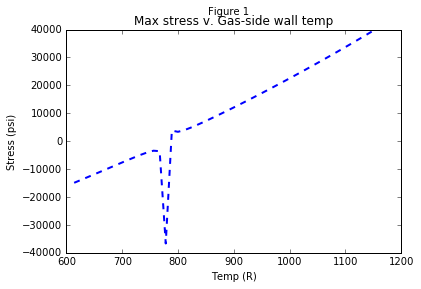

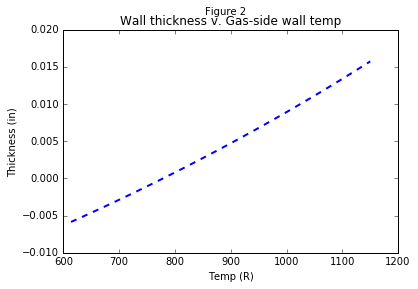

In [186]:
x = np.linspace(Tbulk,Twg)

#figure 1 Max stress v. Gas side wall temp
plt.figure(1)
line, = plt.plot(x,(Pco-Pt)*rccht/(k/((((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*((1/((.5*x/Tcns*(1+(gam-1)/2)+.5)**0.68*(1+(gam+1)/2)**0.12)))))*(Tawt-x))*(x-Tcc))+E*a*q*(k/((((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*((1/((.5*x/Tcns*(1+(gam-1)/2)+.5)**0.68*(1+(gam+1)/2)**0.12)))))*(Tawt-x))*(x-Tcc))/2/(1-v)/k, '--', linewidth=2)
plt.suptitle("Figure 1")
plt.title("Max stress v. Gas-side wall temp")
plt.xlabel("Temp (R)")
plt.ylabel("Stress (psi)")

#figure 2 Wall thickness v. gas side wall temp
plt.figure(2)
line, = plt.plot(x,k/((((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*((1/((.5*x/Tcns*(1+(gam-1)/2)+.5)**0.68*(1+(gam+1)/2)**0.12)))))*(Tawt-x))*(x-Tcc), '--', linewidth=2)
plt.suptitle("Figure 2")
plt.title("Wall thickness v. Gas-side wall temp")
plt.xlabel("Temp (R)")
plt.ylabel("Thickness (in)")

In [187]:
rcc = math.sqrt((At*epsilonc)/math.pi)
#Parametric Equations

#calculate parameters

tout   = 2*t # calculate a better outer thickness or place in input parameters
theta  = 30
thetaN = 30
A1     = math.tan(math.radians(90-thetaN))/(2*(rt-rt*.382*(1-math.cos(math.radians(thetaN)))))
A2     = -(.382*rt*math.sin(math.radians(thetaN)))+A1*(rt+.382*rt*(1-math.cos(math.radians(thetaN))))**2
X1     = rt+.382*rt*(1-math.cos(math.radians(thetaN)))

In [188]:
print("Parametric Equations:\n")
print("Internal Contour:\n")

print("Bell")
print("x(t):")
print(" t")
print("y(t):")
print(" %f * t^2 - %f" % (A1,A2) )
print("Parameters:" )
print("t1:")
print(" %f" % X1 )
print("t2:")
print(" %f\n" % (re-0.0001) )

Rbell = t

A3 = 1.382*rt
A4 = 0.382*rt

print("Throat, rapid expansion")
print("x(t):")
print(" %f * (1- (.382/1.382) * cos(t*3.14159/180))" % A3 )
print("y(t):")
print(" %f * sin(t*3.14159/180)" % A4 )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (thetaN-0.001) )

A5 = 2.5*rt
A6 = -1.5*rt

print("Throat, rapid contraction")
print("x(t):")
print(" %f * (1 - 0.6 * cos(t*3.14159/180))" % A5 )
print("y(t):")
print(" %f * sin(t*3.14159/180)" % A6 )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.001) )

A7 = -math.tan(math.pi/2-math.radians(theta))
A8 = (math.tan(math.pi/2-math.radians(theta))*2.5*rt*(1-0.6*math.cos(math.radians(theta))))-1.5*rt*math.sin(math.radians(theta))
p1 = 2.5*rt*(1-0.6*math.cos(math.radians(theta)))
p2 = rcc-1.5*rt*(1-math.cos(math.radians(theta)))

print("Linear contraction")
print("x(t):")
print(" t")
print("y(t):")
print(" %f * t + %f" % (A7,A8))
print("Parameters:" )
print("t1:")
print(" %f" % (p1+0.0001) )
print("t2:")
print(" %f\n" % (p2-0.0001) )

A9  = 1.5*rt
A10 = 1.5*rt
A11 = (math.tan(2*math.pi-(math.pi/2-math.radians(theta))))*(rcc-1.5*rt*(1-math.cos(math.radians(theta))))+(-math.tan(2*math.pi-(math.pi/2-math.radians(theta)))*(2.5*rt*(1-0.6*math.cos(math.radians(theta))))-1.5*rt*math.sin(math.radians(theta)))-1.5*rt*math.sin(math.radians(theta))

print("Inlet")
print("x(t):")
print(" %f - %f * (1 - cos(t*3.14159/180))" % (rcc,A9))
print("y(t):")
print(" %f * sin(t*3.14159/180) + %f" % (A10,A11))
print("Parameters:")
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.0001) )

Parametric Equations:

Internal Contour:

Bell
x(t):
 t
y(t):
 2.311316 * t^2 - 0.322851
Parameters:
t1:
 0.415110
t2:
 0.733275

Throat, rapid expansion
x(t):
 0.545751 * (1- (.382/1.382) * cos(t*3.14159/180))
y(t):
 0.150852 * sin(t*3.14159/180)
Parameters:
t1:
 0.001
t2:
 29.999000

Throat, rapid contraction
x(t):
 0.987249 * (1 - 0.6 * cos(t*3.14159/180))
y(t):
 -0.592350 * sin(t*3.14159/180)
Parameters:
t1:
 0.001
t2:
 29.999000

Linear contraction
x(t):
 t
y(t):
 -1.732051 * t + 0.525267
Parameters:
t1:
 0.474359
t2:
 0.965347

Inlet
x(t):
 1.044806 - 0.592350 * (1 - cos(t*3.14159/180))
y(t):
 0.592350 * sin(t*3.14159/180) + -1.443111
Parameters:
t1:
 0.001
t2:
 29.999900



In [189]:
print("Cooling Channel, inner:\n" )

A12 = 1/(4*A1**2)

print("Bell")
print("x(t):")
print(" t + ( %f * t / ( t^2 + %f )^0.5)" % (t,A12))
print("y(t):")
print(" %f *t^2 - %f + ( %f / ( %f *( t^2 + %f )^0.5))" % (A1,A2,-t,2*A1,A12))
print("Parameters:")
print("t1:")
print(" %f" % (X1+0.0001) )
print("t2:")
print(" %f\n" % (re-0.0001) )

print("Rapid Expansion")
print("x(t):")
print(" %f * (1- (.382/1.382) * cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180))" % (A3,t) )
print("y(t):")
print(" %f * sin(t*3.14159/180) + (%f *sin(t*3.14159/180))" % (A4,-t) )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (thetaN-0.001) )



print("Rapid Contraction")
print("x(t):")
print(" %f * (1 - 0.6 * cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180))" % (A5,t) )
print("y(t):")
print(" %f * sin(t*3.14159/180) + (%f *sin(t*3.14159/180))" % (A6,t) )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.001) )

A13 = math.cos(math.radians(theta))*t
A14 = math.sin(math.radians(theta))*t

print("Linear contraction")
print("x(t):")
print(" t + %f" % A13)
print("y(t):")
print(" %f * t + %f" % (A7,A8+A14))
print("Parameters:" )
print("t1:")
print(" %f" % (p1+0.0001) )
print("t2:")
print(" %f\n" % (p2-0.0001) )

print("Inlet")
print("x(t):")
print(" %f - %f * (1 - cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180))" % (rcc,A9,t))
print("y(t):")
print(" %f * sin(t*3.14159/180) + %f + (%f *sin(t*3.14159/180))" % (A10,A11,t))
print("Parameters:")
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.0001) )

Cooling Channel, inner:

Bell
x(t):
 t + ( 0.015726 * t / ( t^2 + 0.046797 )^0.5)
y(t):
 2.311316 *t^2 - 0.322851 + ( -0.015726 / ( 4.622631 *( t^2 + 0.046797 )^0.5))
Parameters:
t1:
 0.415210
t2:
 0.733275

Rapid Expansion
x(t):
 0.545751 * (1- (.382/1.382) * cos(t*3.14159/180)) + ( 0.015726 * cos(t*3.14159/180))
y(t):
 0.150852 * sin(t*3.14159/180) + (-0.015726 *sin(t*3.14159/180))
Parameters:
t1:
 0.001
t2:
 29.999000

Rapid Contraction
x(t):
 0.987249 * (1 - 0.6 * cos(t*3.14159/180)) + ( 0.015726 * cos(t*3.14159/180))
y(t):
 -0.592350 * sin(t*3.14159/180) + (0.015726 *sin(t*3.14159/180))
Parameters:
t1:
 0.001
t2:
 29.999000

Linear contraction
x(t):
 t + 0.013619
y(t):
 -1.732051 * t + 0.533130
Parameters:
t1:
 0.474359
t2:
 0.965347

Inlet
x(t):
 1.044806 - 0.592350 * (1 - cos(t*3.14159/180)) + ( 0.015726 * cos(t*3.14159/180))
y(t):
 0.592350 * sin(t*3.14159/180) + -1.443111 + (0.015726 *sin(t*3.14159/180))
Parameters:
t1:
 0.001
t2:
 29.999900



In [190]:
print("Cooling Channel, outer:\n" )

A15 = A_c/math.pi

print("Bell")
print("x(t):")
print(" t + ( %f * t / ( t^2 + %f )^0.5) + ( t / ( t^2 + %f )^0.5) * ( -t + (t^2 + %f * sin(2*3.14159 - arctan(%f*t)))^(.5)) / (sin(2*3.14159-arctan(%f*t)))" % (t,A12,A12,A15,-2*A1,-2*A1))
print("y(t):")
print(" %f *t^2 - %f + ( %f / ( %f *( t^2 + %f )^0.5)) + ( 1 / ( %f * (t^2+ %f )^0.5)) * ( -t + ( t^2 + %f * sin(2*3.14159-arctan(%f*t)))^0.5) / ( sin(2*3.14159 - arctan(%f*t)))" % (A1,A2,-t,2*A1,A12,-2*A1,A12,A15,-2*A1,-2*A1))
print("Parameters:")
print("t1:")
print(" %f" % (X1+0.0001) )
print("t2:")
print(" %f\n" % (re-0.0001) )

print("Rapid Expansion")
print("x(t):")
print(" %f * (1- (.382/1.382) * cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180)) + ( -( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + (( %f * (1 - (0.382)/(1.382) * cos(t*3.14159/180) ))^2 + %f * cos(t*3.14159/180))^0.5)" % (A3,t,A3,A3,A15)     )
print("y(t):")
print(" %f * sin(t*3.14159/180) + (%f *sin(t*3.14159/180)) + ( -( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + ( (%f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * ( -tan(t*3.14159/180) )" % (A4,-t,A3,A3,A15)     )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (thetaN-0.001) )

print("Rapid Contraction")
print("x(t):")
print(" %f * (1 - 0.6 * cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180)) + ( -( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) )^2 + ( %f ) * cos(t*3.14159/180) )^0.5 )" % (A5,t,A5,A5,A15)     )
print("y(t):")
print(" %f * sin(t*3.14159/180) + (%f *sin(t*3.14159/180)) + ( -( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * ( tan(t*3.14159/180) )"             % (A6,t,A5,A5,A15)     )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.001) )

A16 = math.cos(math.radians(theta))*A15
A17 = math.tan(math.pi/2-math.radians(theta))*2.5*rt*(1-0.6*math.cos(math.radians(theta)))
A18 = -1.5*rt*math.sin(math.radians(theta))
A19 = A15 * math.cos(math.radians(theta))
A20 = math.tan(math.radians(theta))

print("Linear contraction")
print("x(t):")
print(" t + %f + ( -t + ( t^2 + %f )^0.5 )" % (A13,A16))
print("y(t):")
print(" %f *t + %f + %f + ( -t + ( t^2 + %f )^0.5 ) * ( %f ) + ( %f )" % (A7,A17,A18,A19,A20,A14))
print("Parameters:" )
print("t1:")
print(" %f" % (p1+0.0001) )
print("t2:")
print(" %f\n" % (p2-0.0001) )

print("Inlet")
print("x(t):")
print(" %f - %f * (1 - cos(t*3.14159/180)) + ( %f * cos(t*3.14159/180)) + ( -( %f - %f * ( 1 - cos(t*3.14159/180) ) ) + ( ( %f - %f * ( 1 - cos(t*3.14159/180)))^2 + %f * cos(t*3.14159/180) )^0.5 )" % (rcc,A9,t,rcc,A9,rcc,A9,A15))
print("y(t):")
print(" %f * sin(t*3.14159/180) + %f + ( %f * sin(t*3.14159/180) ) + ( -( %f - %f * ( 1 - cos(t*3.14159/180) ) ) + ( ( %f - %f * ( 1 - cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * tan(t*3.14159/180)" % (A10,A11,t,rcc,A10,rcc,A10,A15))
print("Parameters:")
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.0001) )

Cooling Channel, outer:

Bell
x(t):
 t + ( 0.015726 * t / ( t^2 + 0.046797 )^0.5) + ( t / ( t^2 + 0.046797 )^0.5) * ( -t + (t^2 + 0.018607 * sin(2*3.14159 - arctan(-4.622631*t)))^(.5)) / (sin(2*3.14159-arctan(-4.622631*t)))
y(t):
 2.311316 *t^2 - 0.322851 + ( -0.015726 / ( 4.622631 *( t^2 + 0.046797 )^0.5)) + ( 1 / ( -4.622631 * (t^2+ 0.046797 )^0.5)) * ( -t + ( t^2 + 0.018607 * sin(2*3.14159-arctan(-4.622631*t)))^0.5) / ( sin(2*3.14159 - arctan(-4.622631*t)))
Parameters:
t1:
 0.415210
t2:
 0.733275

Rapid Expansion
x(t):
 0.545751 * (1- (.382/1.382) * cos(t*3.14159/180)) + ( 0.015726 * cos(t*3.14159/180)) + ( -( 0.545751 * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + (( 0.545751 * (1 - (0.382)/(1.382) * cos(t*3.14159/180) ))^2 + 0.018607 * cos(t*3.14159/180))^0.5)
y(t):
 0.150852 * sin(t*3.14159/180) + (-0.015726 *sin(t*3.14159/180)) + ( -( 0.545751 * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + ( (0.545751 * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) )^2 + 0.018607 * cos(t*

In [191]:
print("Nozzle surface, outer:\n" )

print("Bell")
print("x(t):")
print(" t + ( %f * t / ( t^2 + %f )^0.5 ) + ( t / ( t^2 + %f )^0.5 ) * ( -t + ( t^2 + %f * sin(2*3.14159 - arctan(%f*t)) )^0.5 ) / ( sin(2*3.14159 - arctan(%f*t)) ) + ( %f * t / ( t^2 + %f )^0.5 )" % (t,A12,A12,A15,-2*A1,-2*A1,tout,A12))
print("y(t):")
print(" %f *t^2 - %f + ( %f / ( %f *( t^2 + %f )^0.5)) + ( 1 / ( %f * ( t^2+ %f )^0.5 ) ) * ( -t + ( t^2 + %f * sin(2*3.14159 - arctan(%f*t)) )^0.5 ) / ( sin(2*3.14159 - arctan(%f*t)) ) + ( %f / ( %f * ( t^2 + %f )^0.5 ) )" % (A1,A2,-t,2*A1,A12,-2*A1,A12,A15,-2*A1,-2*A1,-tout,2*A1,A12))
print("Parameters:")
print("t1:")
print(" %f" % (X1+0.0001) )
print("t2:")
print(" %f\n" % (re-0.0001) )

print("Rapid Expansion")
print("x(t):")
print(" %f * ( 1- (.382/1.382) * cos(t*3.14159/180) ) + ( %f * cos(t*3.14159/180) ) + ( -( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) + ( %f * cos(t*3.14159/180) )" % (A3,t,A3,A3,A15,tout)     )
print("y(t):")
print(" %f * sin(t*3.14159/180) + ( %f *sin(t*3.14159/180) ) + ( -( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * ( -tan(t*3.14159/180) ) + ( %f * sin(t*3.14159/180) )" % (A4,-t,A3,A3,A15,-tout)     )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (thetaN-0.001) )

print("Rapid Contraction")
print("x(t):")
print(" %f * ( 1 - 0.6 * cos(t*3.14159/180) ) + ( %f * cos(t*3.14159/180) ) + ( -( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) )^2 + ( %f ) * cos(t*3.14159/180) )^0.5 ) + ( %f * cos(t*3.14159/180) )" % (A5,t,A5,A5,A15,tout)     )
print("y(t):")
print(" %f * sin(t*3.14159/180) + ( %f *sin(t*3.14159/180) ) + ( -( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) ) + ( ( %f * ( 1 - 0.6 * cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * ( tan(t*3.14159/180) ) + ( %f *sin(t*3.14159/180) )"             % (A6,t,A5,A5,A15,tout)     )
print("Parameters:" )
print("t1:")
print(" 0.001" )
print("t2:")
print(" %f\n" % (theta-0.001) )

A21 = math.cos(math.radians(theta))*tout
A22 = math.sin(math.radians(theta))*tout

print("Linear contraction")
print("x(t):")
print(" t + %f + ( -t + ( t^2 + %f )^0.5 ) + %f" % (A13,A16,A21))
print("y(t):")
print(" %f *t + %f + %f + ( -t + ( t^2 + %f )^0.5 ) * ( %f ) + ( %f ) + ( %f )" % (A7,A17,A18,A19,A20,A14,A22))
print("Parameters:" )
print("t1:")
print(" %f" % (p1+0.0001) )
print("t2:")
print(" %f\n" % (p2-0.0001) )

print("Inlet")
print("x(t):")
print(" %f - %f * (1 - cos(t*3.14159/180) ) + ( %f * cos(t*3.14159/180) ) + ( -( %f - %f * ( 1 - cos(t*3.14159/180) ) ) + ( ( %f - %f * ( 1 - cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) + ( %f * cos(t*3.14159/180) )" % (rcc,A9,t,rcc,A9,rcc,A9,A15,tout))
print("y(t):")
print(" %f * sin(t*3.14159/180) + %f + ( %f * sin(t*3.14159/180) ) + ( -( %f - %f * ( 1 - cos(t*3.14159/180) ) ) + ( ( %f - %f * ( 1 - cos(t*3.14159/180) ) )^2 + %f * cos(t*3.14159/180) )^0.5 ) * tan(t*3.14159/180) + ( %f * sin(t*3.14159/180) )" % (A10,A11,t,rcc,A10,rcc,A10,A15,tout))
print("Parameters:")
print("t1:")
print(" 0.001"  )
print("t2:")
print(" %f\n" % (theta-0.0001) )

Nozzle surface, outer:

Bell
x(t):
 t + ( 0.015726 * t / ( t^2 + 0.046797 )^0.5 ) + ( t / ( t^2 + 0.046797 )^0.5 ) * ( -t + ( t^2 + 0.018607 * sin(2*3.14159 - arctan(-4.622631*t)) )^0.5 ) / ( sin(2*3.14159 - arctan(-4.622631*t)) ) + ( 0.031453 * t / ( t^2 + 0.046797 )^0.5 )
y(t):
 2.311316 *t^2 - 0.322851 + ( -0.015726 / ( 4.622631 *( t^2 + 0.046797 )^0.5)) + ( 1 / ( -4.622631 * ( t^2+ 0.046797 )^0.5 ) ) * ( -t + ( t^2 + 0.018607 * sin(2*3.14159 - arctan(-4.622631*t)) )^0.5 ) / ( sin(2*3.14159 - arctan(-4.622631*t)) ) + ( -0.031453 / ( 4.622631 * ( t^2 + 0.046797 )^0.5 ) )
Parameters:
t1:
 0.415210
t2:
 0.733275

Rapid Expansion
x(t):
 0.545751 * ( 1- (.382/1.382) * cos(t*3.14159/180) ) + ( 0.015726 * cos(t*3.14159/180) ) + ( -( 0.545751 * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) ) + ( ( 0.545751 * ( 1 - (0.382)/(1.382) * cos(t*3.14159/180) ) )^2 + 0.018607 * cos(t*3.14159/180) )^0.5 ) + ( 0.031453 * cos(t*3.14159/180) )
y(t):
 0.150852 * sin(t*3.14159/180) + ( -0.015726 *sin(t*3.1

In [197]:
import sympy as sympy

from sympy.solvers import solve
from sympy import Symbol
from sympy import log

import numpy as np
import matplotlib.pyplot as plt

#Boiling analysis
#Heat transfer along bell
#find Ax/At
x  = [0]
dx = 0.01

thetaNr = math.pi/180*thetaN
thetar  = math.pi/180*theta

rx     = []
Ax     = []
Px     = []
Tx     = []
Vx     = []
ax     = []
Mx1    = []
Mx     = []
sigmax = []
hgx    = []
Tawx   = []
qx     = []

i=0
pxguess = 14
mxguess = 2
while x[i] < ((A1*re**2-A2)-(A1*X1**2-A2)):
    rx.append((((A1*re**2-A2)-x[i]+A2)/(A1))**.5)
    x.append(x[i]+dx)
    Ax.append(math.pi*(rx[i])**2)
    
    Volumex = Ax[i]*dx
    Volumet = At*dx

    Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At
    Mx1.append(findroot(Machx,mxguess,solver='anewton',verify=False))
    #Px.append(-(Pi-Pe)/2*math.cos(math.pi*x[i]/(A1*re**2-A2-(A10*math.sin(thetar)+A11)))+Pi-(Pi-Pe)/2)
    PTtoE = lambda p1: ((2/(gam+1))**(1/(gam-1))*(Pcns/p1)**(1/gam))/((gam+1)/(gam-1)*(1-(p1/Pcns)**((gam-1)/gam)))**0.5-Ax[i]/At
    Px.append(findroot(PTtoE,pxguess))
    Tx.append(Tcns/(Pcns/Px[i])**((gam-1)/gam))
    Vx.append(math.sqrt(2*g*gam/(gam-1)*R*Tcns*(1-(Px[i]/Pcns)**((gam-1)/gam))))
    ax.append(math.sqrt(g*gam*R*Tx[i]))
    Mx.append(Vx[i]/ax[i])
    sigmax.append((1/((.5*Twg/Tcns*(1+(gam-1)/2*Mx[i]**2)+.5)**0.68*(1+(gam+1)/2*Mx[i]**2)**0.12)))
    hgx.append(((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*(At/Ax[i])**0.9*sigmax[i]))
    Tawx.append(Tcns*((1+rturb*((gam-1)/2)*Mx[i]**2)/(1+((gam-1)/2)*Mx[i]**2)))
    qx.append(hgx[i]*(Tawx[i]-Twg))

    mxguess = Mx1[i]*.9
    pxguess = Px[i]
    i=i+1

while x[i] < ((A1*re**2-A2)-(A1*X1**2-A2))+.382*rt*sin(thetaN/180*math.pi):
    yr = Symbol("yr")
    rx.append(solve((x[i]-(A1*re**2-A2))**2+(yr-1.382*rt)**2-(.382*rt)**2,yr)[0])
    x.append(x[i]+dx)
    Ax.append(math.pi*(rx[i])**2)
    
    Volumex = Ax[i]*dx
    Volumet = (At)*dx
    
    Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At
    Mx1.append(1)
    #Mx1.append(findroot(Machx,mxguess,solver='mnewton',tol=0.00000000000000001,verify=False))
    #Px.append(-(Pi-Pe)/2*math.cos(math.pi*x[i]/(A1*re**2-A2-(A10*math.sin(thetar)+A11)))+Pi-(Pi-Pe)/2)
    PTtoE = lambda p1: ((2/(gam+1))**(1/(gam-1))*(Pcns/p1)**(1/gam))/((gam+1)/(gam-1)*(1-(p1/Pcns)**((gam-1)/gam)))**0.5-Ax[i]/At
    Px.append(findroot(PTtoE,pxguess))
    Tx.append(Tcns/(Pcns/Px[i])**((gam-1)/gam))
    Vx.append(math.sqrt(2*g*gam/(gam-1)*R*Tcns*(1-(Px[i]/Pcns)**((gam-1)/gam))))
    ax.append(math.sqrt(g*gam*R*Tx[i]))
    Mx.append(Vx[i]/ax[i])
    sigmax.append((1/((.5*Twg/Tcns*(1+(gam-1)/2*Mx[i]**2)+.5)**0.68*(1+(gam+1)/2*Mx[i]**2)**0.12)))
    hgx.append(((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*(At/Ax[i])**0.9*sigmax[i]))
    Tawx.append(Tcns*((1+rturb*((gam-1)/2)*Mx[i]**2)/(1+((gam-1)/2)*Mx[i]**2)))
    qx.append(hgx[i]*(Tawx[i]-Twg))
    
    mxguess = Mx1[i]
    pxguess = Px[i]    
    i=i+1

mxguess = .9
while x[i] < ((A1*re**2-A2)-(A1*X1**2-A2))+.382*rt*sin(thetaN/180*math.pi)+1.5*rt*sin(theta/180*math.pi):
    yr = Symbol("yr")
    rx.append(solve((x[i]-(A1*re**2-A2))**2+(yr-2.5*rt)**2-(1.5*rt)**2,yr)[0])
    x.append(x[i]+dx)
    Ax.append(math.pi*(rx[i])**2)
    
    Volumex = Ax[i]*dx
    Volumet = (At)*dx
    
    ####################here#####################
    Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At
    Mx1.append(1)
    #Mx1.append(findroot(Machx,mxguess,solver='mnewton',verify=False))
    #Px.append(-(Pi-Pe)/2*math.cos(math.pi*x[i]/(A1*re**2-A2-(A10*math.sin(thetar)+A11)))+Pi-(Pi-Pe)/2)
    PCtoT = lambda p1: (2/(gam+1)*(Pcns/p1)**((gam-1)/gam))**((gam+1)/(2*(gam-1)))/(2/(gam-1)*((Pcns/p1)**((gam-1)/gam)-1))**0.5-Ax[i]/At
    Px.append(findroot(PCtoT,pxguess))
    Tx.append(Tcns/(Pcns/Px[i])**((gam-1)/gam))
    Vx.append(math.sqrt(2*g*gam/(gam-1)*R*Tcns*(1-(Px[i]/Pcns)**((gam-1)/gam))))
    ax.append(math.sqrt(g*gam*R*Tx[i]))
    Mx.append(Vx[i]/ax[i])
    sigmax.append((1/((.5*Twg/Tcns*(1+(gam-1)/2*Mx[i]**2)+.5)**0.68*(1+(gam+1)/2*Mx[i]**2)**0.12)))
    hgx.append(((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*(At/Ax[i])**0.9*sigmax[i]))
    Tawx.append(Tcns*((1+rturb*((gam-1)/2)*Mx[i]**2)/(1+((gam-1)/2)*Mx[i]**2)))
    qx.append(hgx[i]*(Tawx[i]-Twg))
    
    mxguess = Mi
    pxguess = Px[i]
    i=i+1
    
m = math.tan(thetar)
b = rt*(2.5-1.5*math.cos(thetar))-m*((A1*re**2-A2)+1.5*rt*math.sin(thetar))

while x[i] < (A1*re**2-A2)-(A7*p2+A8):
    rx.append(m*x[i]+b)
    x.append(x[i]+dx)
    Ax.append(math.pi*(rx[i])**2)
    
    Volumex = Ax[i]*dx
    Volumet = (At)*dx
    
    Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At
    Mx1.append(findroot(Machx,mxguess,solver='anewton',verify=False))
    #Px.append(-(Pi-Pe)/2*math.cos(math.pi*x[i]/(A1*re**2-A2-(A10*math.sin(thetar)+A11)))+Pi-(Pi-Pe)/2)
    PCtoT = lambda p1: (2/(gam+1)*(Pcns/p1)**((gam-1)/gam))**((gam+1)/(2*(gam-1)))/(2/(gam-1)*((Pcns/p1)**((gam-1)/gam)-1))**0.5-Ax[i]/At
    Px.append(findroot(PCtoT,pxguess))
    Tx.append(Tcns/(Pcns/Px[i])**((gam-1)/gam))
    Vx.append(math.sqrt(2*g*gam/(gam-1)*R*Tcns*(1-(Px[i]/Pcns)**((gam-1)/gam))))
    ax.append(math.sqrt(g*gam*R*Tx[i]))
    Mx.append(Vx[i]/ax[i])
    sigmax.append((1/((.5*Twg/Tcns*(1+(gam-1)/2*Mx[i]**2)+.5)**0.68*(1+(gam+1)/2*Mx[i]**2)**0.12)))
    hgx.append(((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*(At/Ax[i])**0.9*sigmax[i]))
    Tawx.append(Tcns*((1+rturb*((gam-1)/2)*Mx[i]**2)/(1+((gam-1)/2)*Mx[i]**2)))
    qx.append(hgx[i]*(Tawx[i]-Twg))
    
    mxguess = Mi    
    pxguess = Px[i]
    i=i+1

xcenter = (A1*re**2-A2)-(A10*math.sin(0)+A11)
ycenter = rcc-1.5*rt
    
while x[i] < (A1*re**2-A2)-(A10*math.sin(0)+A11):
    yr = Symbol("yr")
    rx.append(solve((x[i]-xcenter)**2+(yr-ycenter)**2-(1.5*rt)**2,yr)[1])
    x.append(x[i]+dx)
    Ax.append(math.pi*(rx[i])**2)
    
    Volumex = Ax[i]*dx
    Volumet = (At)*dx
    
    Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At
    Mx1.append(findroot(Machx,mxguess,solver='mnewton',verify=False))
    #Px.append(-(Pi-Pe)/2*math.cos(math.pi*x[i]/(A1*re**2-A2-(A10*math.sin(thetar)+A11)))+Pi-(Pi-Pe)/2)
    PCtoT = lambda p1: (2/(gam+1)*(Pcns/p1)**((gam-1)/gam))**((gam+1)/(2*(gam-1)))/(2/(gam-1)*((Pcns/p1)**((gam-1)/gam)-1))**0.5-Ax[i]/At
    Px.append(findroot(PCtoT,pxguess))
    Tx.append(Tcns/(Pcns/Px[i])**((gam-1)/gam))
    Vx.append(math.sqrt(2*g*gam/(gam-1)*R*Tcns*(1-(Px[i]/Pcns)**((gam-1)/gam))))
    ax.append(math.sqrt(g*gam*R*Tx[i]))
    Mx.append(Vx[i]/ax[i])
    sigmax.append((1/((.5*Twg/Tcns*(1+(gam-1)/2*Mx[i]**2)+.5)**0.68*(1+(gam+1)/2*Mx[i]**2)**0.12)))
    hgx.append(((0.026/(2*rt)**0.2*(mucc**0.2*Cp/Pr**0.6)*(Pcns*g/cstar)**0.8*(2*rt/rmean)**0.1)*(At/Ax[i])**0.9*sigmax[i]))
    Tawx.append(Tcns*((1+rturb*((gam-1)/2)*Mx[i]**2)/(1+((gam-1)/2)*Mx[i]**2)))
    qx.append(hgx[i]*(Tawx[i]-Twg))
    
    mxguess = Mi   
    pxguess = Px[i]
    i=i+1
x.pop()



2.3699999999999934

0.48991805147097994
0.39489968245506624


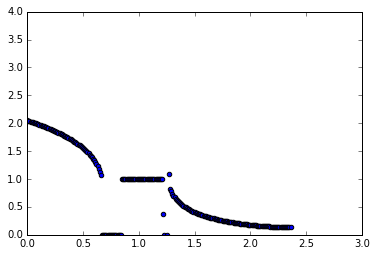

In [203]:
plt.scatter(x,Mx1)
plt.axis([0,3,0,4])
print(At)
print(rt)


In [194]:
Machx = lambda M1: 1/M1*(2/(gam+1)*(1+(gam-1)/2*M1**2)**((gam+1)/(gam-1)))**.5-Ax[i]/At